In [1]:
from keras.models import load_model
import cv2
import numpy as np

In [14]:
import os
import wave
import pylab

def graph_spectrogram(wav_file, output_dir):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    filename, _ = os.path.splitext(wav_file)
    output_file = os.path.join(output_dir, f"{os.path.basename(filename)}.jpg")
    pylab.savefig(output_file)
    pylab.close()

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

wav_folder = 'mono_audio/testing'
output_folder = 'mono_audio1/spectrograms'

# Create output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(wav_folder):
    if filename.endswith('.wav'):
        wav_path = os.path.join(wav_folder, filename)
        graph_spectrogram(wav_path, output_folder)


C:\Users\Ankit\AppData\Local\Temp\ipykernel_6268\1910090201.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')
C:\Users\Ankit\AppData\Roaming\Python\Python311\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_6268\1910090201.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')
C:\Users\Ankit\AppData\Roaming\Python\Python311\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_6268\1910090201.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprising

In [15]:
import os
import cv2
import numpy as np
from keras.models import load_model

model = load_model('model-020.model')
spectrogram_folder = 'mono_audio1/spectrograms'

for filename in os.listdir(spectrogram_folder):
    if filename.endswith('.jpg'):
        spectrogram_path = os.path.join(spectrogram_folder, filename)
        spectrogram_img = cv2.imread(spectrogram_path, cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(spectrogram_img, (100, 100))
        normalized = resized / 255.0
        reshaped = np.reshape(normalized, (1, 100, 100, 1))

        result = model.predict(reshaped)
        label = np.argmax(result, axis=1)[0]

        if label == 0:
            print(f'{filename}: Female')
        else:
            print(f'{filename}: Male')


1/1 [==============================] - 0s 191ms/step
dshR6qKk.jpg: Female
1/1 [==============================] - 0s 57ms/step
g23.jpg: Male
1/1 [==============================] - 0s 70ms/step
gi11.jpg: Male
1/1 [==============================] - 0s 62ms/step
gi22.jpg: Male
1/1 [==============================] - 0s 69ms/step
gi24.jpg: Male
1/1 [==============================] - 0s 48ms/step
hello-this-is-chat-gpt-142698.jpg: Male
1/1 [==============================] - 0s 50ms/step
mono_audio.jpg: Male
1/1 [==============================] - 0s 52ms/step
mono_audio1.jpg: Male
1/1 [==============================] - 0s 44ms/step
sashwat.jpg: Male
1/1 [==============================] - 0s 51ms/step
spectrogram2.jpg: Male


C:\Users\Ankit\AppData\Local\Temp\ipykernel_6268\2248445958.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')
C:\Users\Ankit\AppData\Roaming\Python\Python311\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


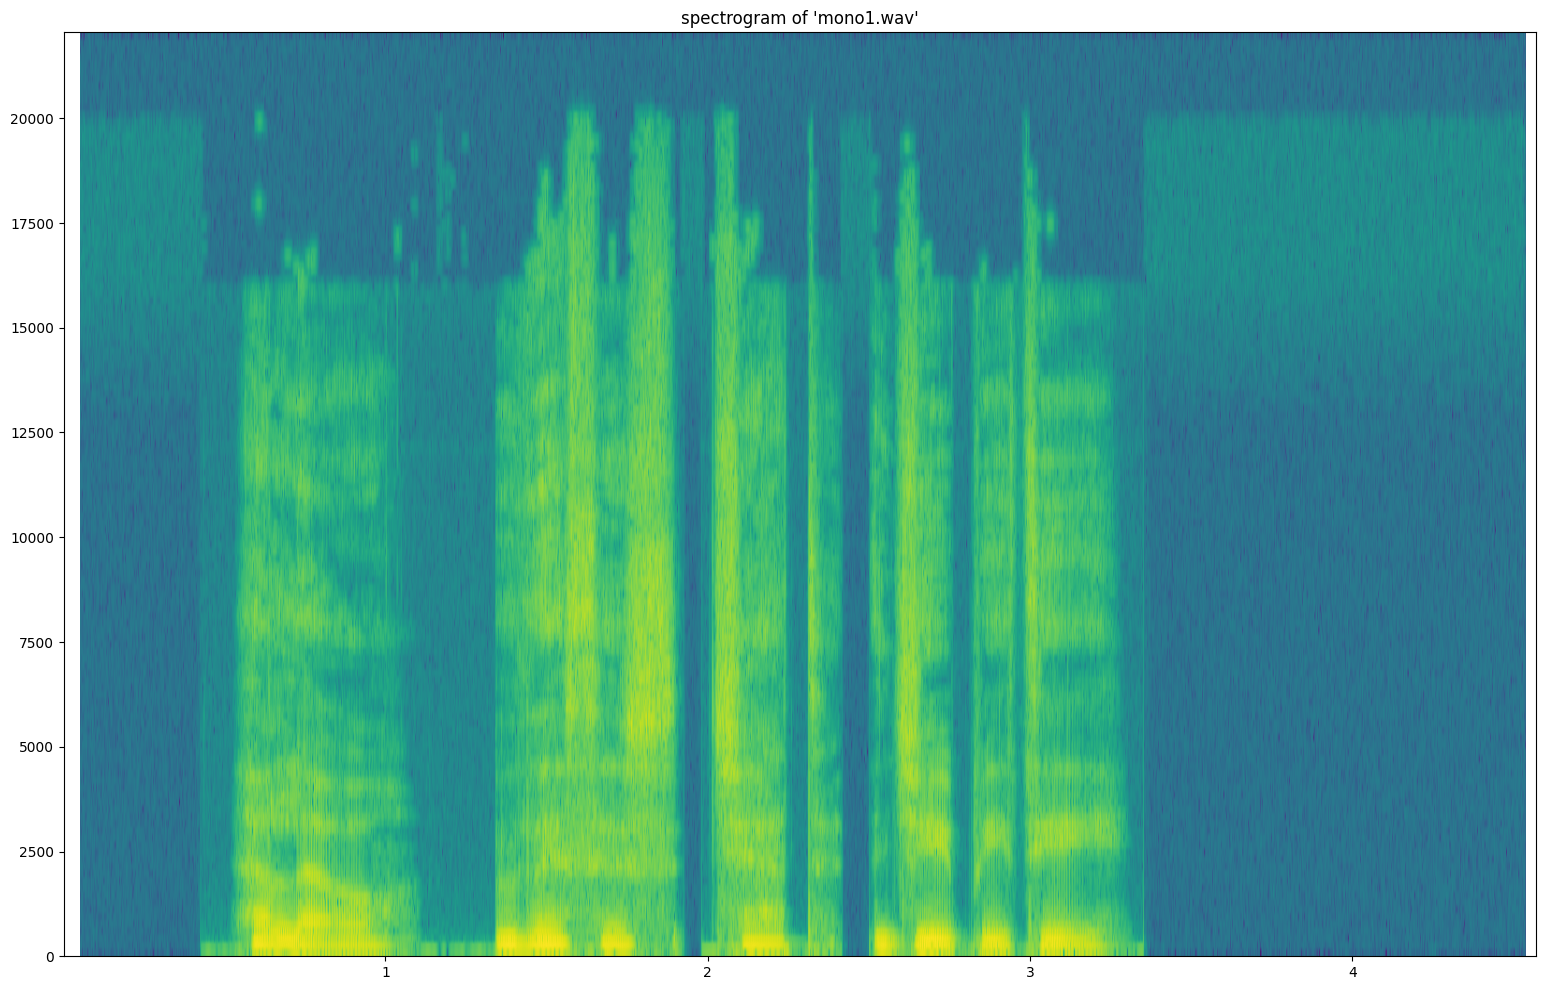

In [25]:
import os
import wave

import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram2.jpg')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate
graph_spectrogram('mono1.wav') 

In [26]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model-020.model')

spectrogram_img = cv2.imread('spectrogram2.jpg', cv2.IMREAD_GRAYSCALE)
resized = cv2.resize(spectrogram_img, (100, 100))
normalized = resized / 255.0
reshaped = np.reshape(normalized, (1, 100, 100, 1))

result = model.predict(reshaped)
label = np.argmax(result, axis=1)[0]

if label == 0:
    print('Female')
else:
    print('Male')


1/1 [==============================] - 0s 161ms/step
Male


In [24]:
from pydub import AudioSegment

# Load the audio file
sound = AudioSegment.from_wav("C:/Users/Ankit/Downloads/chatgpt.wav")

# Extract the first channel and convert to mono
mono_sound = sound.split_to_mono()[0]

# Export the mono audio as a WAV file
mono_sound.export("mono1.wav", format="wav")


c:\Users\Ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='mono1.wav'>